## Define regimes for N' and N''

$N(z)=N_0 + N'(z-z_0) + N''(z-z_0)^2$, where $N_0$ is the concentration at $z_0$. I will start with $z_0=H_s$, so $N_0$ is a reference concentration at shelf break depth.
 
 Non-dimensional profile:
 
 $\hat{N(z)}=\frac{N(z)}{N_0} = 1 + \hat{N'}(z-Hs) + \hat{N''}(z-H_s)^2$,
 
 where $\hat{}$ variables are divided by $N_0$.
 
 I can't use a non-dim profile for my model so I need o define dimensional regimes where N' and N'' give reasonable concentrations. For the non-dimesional case I found $0.0<\hat{N'}<0.006$ and $0.0001<\hat{N''}<0.00001$.
 
 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import sympy as sym
sym.init_printing() # enable fancy printing

In [2]:
# Set appearance options seaborn

sns.set_style('white')
sns.set_context('notebook')

In [3]:
# Constants and scales from canyon bathy

#L = 6400.0 # canyon length
#R = 5000.0 # Upstream radius of curvature
#g = 9.81 # accel. gravity
#Wsb = 13000 # Width at shelf break
#Hs = 147.5 # Shelf break depth
#Hh = 97.5 # 
#Hr = 130.0 # rim depth at dn station
# NOTE: The default values of all functions correspond to the base case


In [81]:
N1,N2,z,Co,Hs,tau = sym.symbols('N1,N2,z,Co,Hs,tau')
func = Co + N1*(z-Hs) + N2*((z-Hs)**2)


In [5]:
func

A reasonable number for $\hat{N'}$ is 0.006. This comes from the slope of the linear nitrate profile I use $d\hat{N}/dz \approx ((32\mu M-3 \mu M)/(150 m))/32 \mu M$. Using a higher value gives negative concetrations at surface.

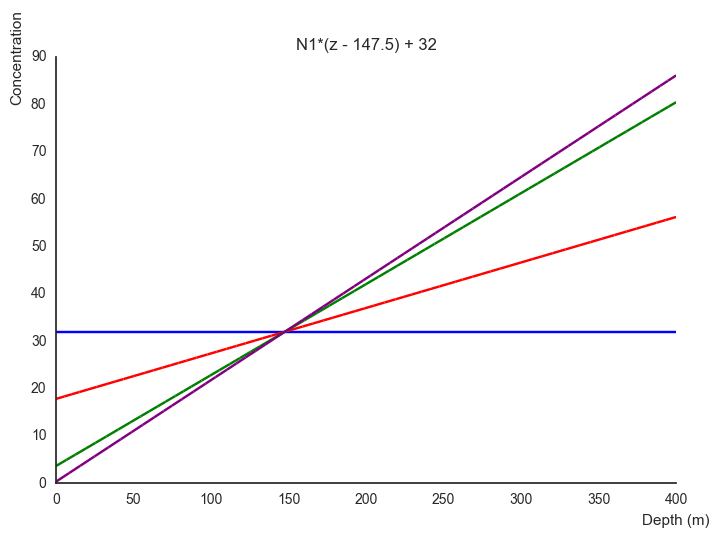

In [59]:
func = 32 + N1*(z-Hs) + N2*((z-Hs)**2)
func = func.subs({Hs:147.5,N2:0})
hand =sym.plot(func.subs(N1,0.0*32),
               func.subs(N1,0.003*32),
               func.subs(N1,0.006*32),
               func.subs(N1,0.0067*32),(z, 0, 400),
               xlabel='Depth (m)',
               ylabel='Concentration',
               title='%s' %func,
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

### What should be the value of $\hat{N''}$ to get stable profiles given an $\hat{N'}$? 

i.e. Profiles without 'bellies' (max, mins or inflection points). This might not be necessary but I want to classify them.

There are bellies wherever 

$d\hat{N}/dz=\hat{N'}+2\hat{N''}(z-Hs)=0$. (1)

I don't want these points (I'll call them $z_{belly}$) to be within my profile ($0\le z \le 400$), so I have the conditions:

$z_{belly} \le 0 $ ,  $z_{belly} \ge 400$ (2),

but solving (1) for $z_{belly}$ gives,

$z_{belly}=\frac{-\hat{N'}}{2\hat{N''}}+Hs$ (3). 

Taking the equalities in conditions (2) and equating to (3) gives:

(4) $\frac{\hat{N'}}{2Hs}\ge {\hat{N''}}$ and (5) $\frac{\hat{N'}}{2(Hs-400)}\le {\hat{N''}}$, 

for a given $ 0\le\hat{N'}\le0.0067$. This last range comes from above.

The region that satisfies conditions (4) and (5) is the triangle plotted below. Also, these hold for the dimensional parameters $N'$ and $N''$, where $  0 \le N'\le No0.00067$





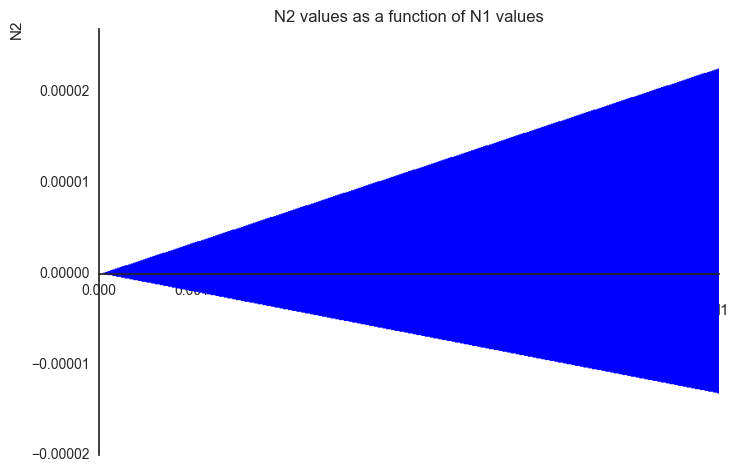

In [60]:
p2 = sym.plot_implicit(sym.And(N1/(2*(-400+147.5)) < N2,N1/(2*147.5) > N2), (N1, 0, 0.0067) ,(N2, -0.00002, 0.000027),
                      title='N2 values as a function of N1 values')


Let's see if it works...

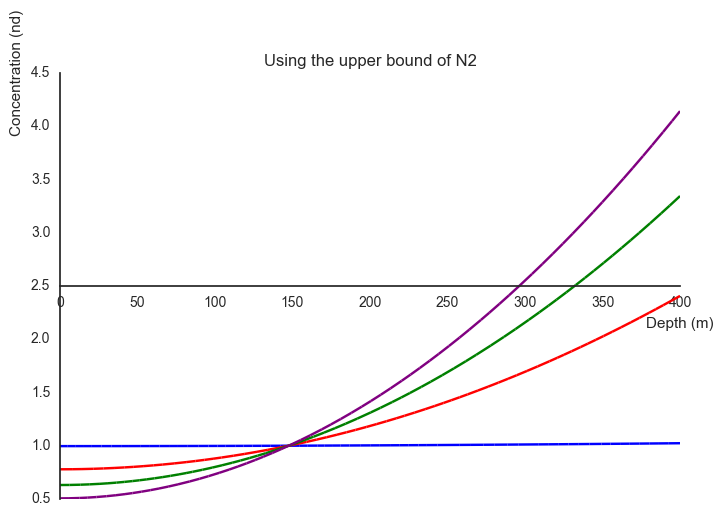

In [73]:
func = 1 + N1*(z-Hs) + N2*((z-Hs)**2)
hand = sym.plot(func.subs({N1:0.00005,Hs:147.5,N2:0.00005/(2*147.5)}),
               func.subs({N1:0.003,Hs:147.5,N2:0.003/(2*147.5)}),
               func.subs({N1:0.005,Hs:147.5,N2:0.005/(2*147.5)}),
               func.subs({N1:0.0067,Hs:147.5,N2:0.0067/(2*147.5)}),(z, 0, 400),
               xlabel='Depth (m)',
               ylabel='Concentration (nd)',
               title='Using the upper bound of N2',
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

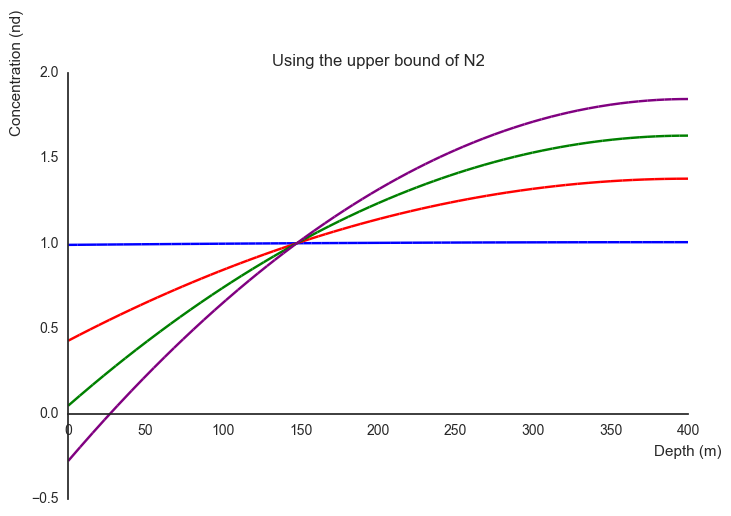

In [78]:
func = 1 + N1*(z-Hs) + N2*((z-Hs)**2)
hand = sym.plot(func.subs({N1:0.00005,Hs:147.5,N2:0.00005/(2*(147.5-400))}),
               func.subs({N1:0.003,Hs:147.5,N2:0.003/(2*(147.5-400))}),
               func.subs({N1:0.005,Hs:147.5,N2:0.005/(2*(147.5-400))}),
               func.subs({N1:0.0067,Hs:147.5,N2:0.0067/(2*(147.5-400))}),(z, 0, 400),
               xlabel='Depth (m)',
               ylabel='Concentration (nd)',
               title='Using the upper bound of N2',
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()

Oops, N1=0.0067 (purple) becomes negative :(, but none of them have bellies.

## $\tau_v$ as a function of N' and N''

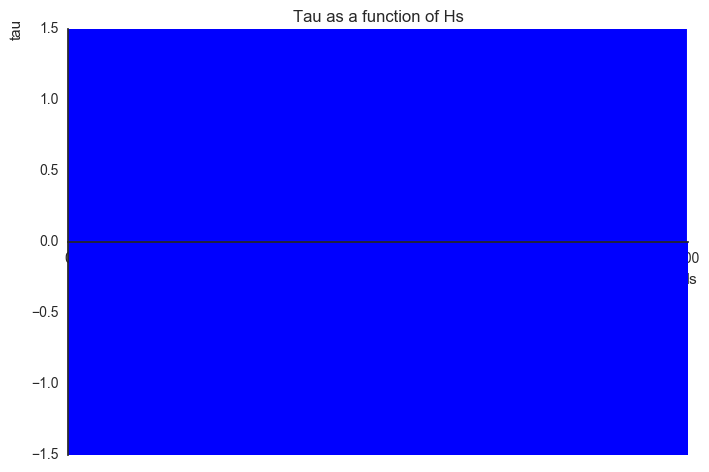

In [88]:
p2 = sym.plot_implicit(sym.Or(1/Hs > tau, 1/(Hs-400)< tau), (Hs, 0, 400),(tau,-1.5,1.5),
                      title='Tau as a function of Hs')


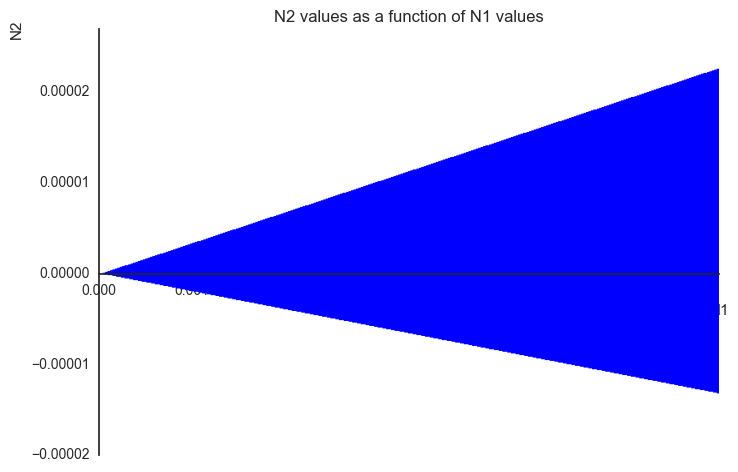

In [38]:
func = 32 + N1*(z-Hs) + N2*((z-Hs)**2)
func = func.subs({Hs:147.5,N2:-0.0000132})
hand =sym.plot(func.subs(N1,0.0),
               func.subs(N1,0.003),
               func.subs(N1,0.006),
               func.subs(N1,0.0067),(z, 0, 400),
               xlabel='Depth (m)',
               ylabel='Concentration',
               title='%s' %func,
               show=False)
hand[1].line_color='r'
hand[2].line_color='g'
hand[3].line_color='purple'

hand.show()